In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v3 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


In [2]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
                  
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return parameters

In [3]:
parameters = initialize_parameters(3,2,1)
parameters


{'W1': array([[ 0.01624345, -0.00611756, -0.00528172],
        [-0.01072969,  0.00865408, -0.02301539]]), 'b1': array([[0.],
        [0.]]), 'W2': array([[ 0.01744812, -0.00761207]]), 'b2': array([[0.]])}

In [4]:
def initialize_parameters_deep(layer_dims):
    
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters["W" + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [5]:
parameters = initialize_parameters_deep([5,4,3])
print(parameters)

{'W1': array([[ 0.00319039, -0.0024937 ,  0.01462108, -0.02060141, -0.00322417],
       [-0.00384054,  0.01133769, -0.01099891, -0.00172428, -0.00877858],
       [ 0.00042214,  0.00582815, -0.01100619,  0.01144724,  0.00901591],
       [ 0.00502494,  0.00900856, -0.00683728, -0.0012289 , -0.00935769]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.00267888,  0.00530355, -0.00691661, -0.00396754],
       [-0.00687173, -0.00845206, -0.00671246, -0.00012665],
       [-0.0111731 ,  0.00234416,  0.01659802,  0.00742044]]), 'b2': array([[0.],
       [0.],
       [0.]])}


In [6]:
def linear_forward(A, W, b):
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    cache = (A, W, b)
    return Z, cache

In [7]:
A, W, b = linear_forward_test_case()
Z, cache = linear_forward(A, W, b)
print(Z)
print(cache)

[[ 3.26295337 -1.23429987]]
(array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]), array([[-0.24937038]]))


In [8]:
def linear_forward_activation(A_pre, W, b, activation):
    
    Z, linear_cache = linear_forward(A_pre, W, b)
    if activation == 'sigmoid':
        A, activation_cache = sigmoid(Z)
    
    elif activation == 'relu':
        A, activation_cache = relu(Z)
    
    assert(A.shape == (W.shape[0], A_pre.shape[1]))    
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [9]:
A_pre, W, b = linear_activation_forward_test_case()

A, cache = linear_forward_activation(A_pre, W, b, 'sigmoid')
print(A)

A, cache = linear_forward_activation(A_pre, W, b, 'relu')
print(A)

[[0.96890023 0.11013289]]
[[3.43896131 0.        ]]


In [10]:
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_pre = A
        A, cache = linear_forward_activation(A_pre, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
        caches.append(cache)
        
    AL, cache = linear_forward_activation(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    return AL, caches

In [11]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))


AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


In [12]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1 - AL), 1 - Y)) / m
    ### END CODE HERE ###

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost


In [13]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615397


In [14]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    ### END CODE HERE ###

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db


In [15]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))


dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [16]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###

    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###

    return dA_prev, dW, db


In [17]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))


sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [18]:
def L_model_backward(AL, Y, caches):
    
    grads ={}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads['dA' + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

In [19]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
grads

{'dA2': array([[ 0.12913162, -0.44014127],
        [-0.14175655,  0.48317296],
        [ 0.01663708, -0.05670698]]),
 'dW2': array([[-0.39202432, -0.13325855, -0.04601089]]),
 'db2': array([[0.15187861]]),
 'dA1': array([[ 0.        ,  0.52257901],
        [ 0.        , -0.3269206 ],
        [ 0.        , -0.32070404],
        [ 0.        , -0.74079187]]),
 'dW1': array([[0.41010002, 0.07807203, 0.13798444, 0.10502167],
        [0.        , 0.        , 0.        , 0.        ],
        [0.05283652, 0.01005865, 0.01777766, 0.0135308 ]]),
 'db1': array([[-0.22007063],
        [ 0.        ],
        [-0.02835349]])}

In [20]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [21]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)
parameters

{'W1': array([[-0.59562069, -0.09991781, -2.14584584,  1.82662008],
        [-1.76569676, -0.80627147,  0.51115557, -1.18258802],
        [-1.0535704 , -0.86128581,  0.68284052,  2.20374577]]),
 'b1': array([[-0.04659241],
        [-1.28888275],
        [ 0.53405496]]),
 'W2': array([[-0.55569196,  0.0354055 ,  1.32964895]]),
 'b2': array([[-0.84610769]])}

In [25]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearset'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()


ValueError: Illegal interpolation string

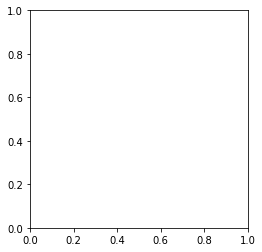

In [63]:
index = 10
plt.imshow(train_x_orig[0])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")


In [64]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [65]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255
test_x = test_x_flatten/255

print(train_x_flatten.shape)
print(test_x_flatten.shape)

(12288, 209)
(12288, 50)


In [66]:
n_x = 12288
n_h = 7
n_y = 1
layer_dims = (n_x, n_h, n_y)

In [67]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layer_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        
        cost = compute_cost(A2, Y)
        
        dA2 = -(np.divide(Y, A2) - np.divide(1-Y, 1-A2))
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i%100 == 0:
            print("Cost after iteration{}:{}".format(i, np.squeeze(cost)))
        if print_cost and i%100 == 0:
            costs.append(cost)
            
        
        plt.plot(np.squeeze(costs))
        plt.ylabel("cost")
        plt.xlabel("iteration(per tens)")
        plt.title("learning_rate="+str(learning_rate))
        plt.show()
        
        return parameters

Cost after iteration0:0.6930497356599888


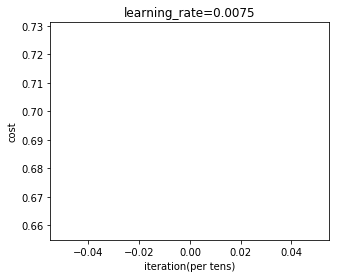

In [68]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)